In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Sea el sistema autonomo:

$$
x´=2x-y
$$

$$
y´=x+2y
$$

La matriz de estabilidad se define como:

\begin{pmatrix}
\frac{\partial f(q_0,p_0)}{\partial q} & \frac{\partial f(q_0,p_0)}{\partial p}\\\frac{\partial g(q_0,p_0)}{\partial q} & \frac{\partial g(q_0,p_0)}{\partial p}
\end{pmatrix}

donde $(q_0,p_0)$ es un punto fijo. Para el sistema el punto (0,0) es un punto fijo, ya que $\dot{q} = x´=0$

Entonces la matriz de estabilidad para el punto $(0,0)$:

\begin{pmatrix}
2 & -1 \\ 1 & 2
\end{pmatrix}



In [8]:
def System(r,t):
    
    x=r[0]
    y=r[1]
    
  
    dx=2*x-y
    dy=x+2*y
    
    return [dx,dy]

In [15]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]

    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = np.array([x[0],y[0]])
    K11 = f(present,t[0])
    
    # Euler
    x[1] = x[0] + h*K11[0]
    y[1] = y[0] + h*K11[1]
    
    xc = x.copy()
    yc = y.copy()
    
    for i in range(2,len(t)):
        
        present = np.array([x[i-1],y[i-1]])
        past = np.array([x[i-2],y[i-2]])
        
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        
        x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        y[i] = y[i-1] + 0.5*h*(3*K11[1]-K12[1])
        
        xc[i] = x[i]
        yc[i] = y[i]
        
        # Futuro
        futuro = np.array([x[i],y[i]])
        K13 = f(futuro,t[i])
        
        xc[i] = xc[i-1] + h*(5*K13[0]+8*K11[0]-K12[0])/12
        yc[i] = yc[i-1] + h*(5*K13[1]+8*K11[1]-K12[1])/12
    
    return xc,yc

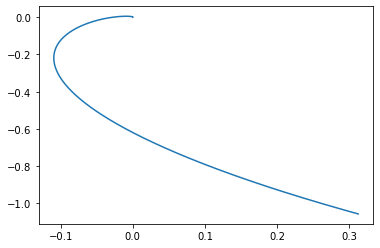

In [79]:
t = np.linspace(0,5,100000)
h = t[1] - t[0]
r0 = [0+h,0]
sol = IntegratorAdams(System,r0,t)
plt.plot(sol[0],sol[1])

In [ ]:
##Se supone que deberia oscilar 

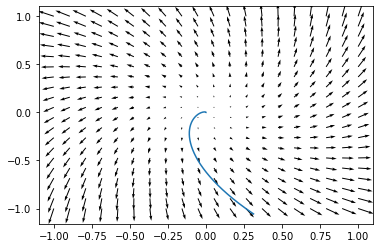

In [83]:

plt.plot(sol[0],sol[1])
x_,y_ = np.meshgrid(np.linspace(-1,1,20),np.linspace(-1,1,20))
plt.quiver(x_,y_,System([x_,y_],t)[0],System([x_,y_],t)[1])
plt.show()